# Question 3 (Applied): Exercise 9
This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

First we imported the data set by reading `Auto.csv` using pandas

In [19]:
import pandas as pd
import numpy as np
Auto = pd.read_csv('Auto.data',
                   na_values=['?'],
                   delim_whitespace=True)
Auto.shape

(397, 9)

The missing values are then removed using the following code. The data set after filtering missing value rows indicates that there is no row missing values.

In [20]:
Auto = Auto.dropna()
Auto.shape

(392, 9)

#### (a) Which of the predictors are quantitative, and which are qualitative?

#### (b) What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in numpy.

#### (c) What is the mean and standard deviation of each quantitative predictor?

#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

We used the Boolean Indexing method discussed in the Lab to filter 10th - 85th observations.

In [21]:
keep_rows = np.ones(Auto.shape[0], bool)

Set the elements from 10 to 85 to `False`

In [22]:
keep_rows[10:86] = False

After the removal, the data set now has **321** rows

In [23]:
Auto_filtered = Auto[keep_rows]
Auto_filtered.shape

(316, 9)

To calculate the range, mean, and standard variations, we used the `describe` function from `pandas` dataframe and print out the 4 information that we are interested. The results can be found in the following table

In [24]:
descriptions = ['min', 'max', 'mean', 'std']
Auto_filtered.describe().loc[descriptions, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910


#### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

To visualize the relation between predictors, we created scatterplots.

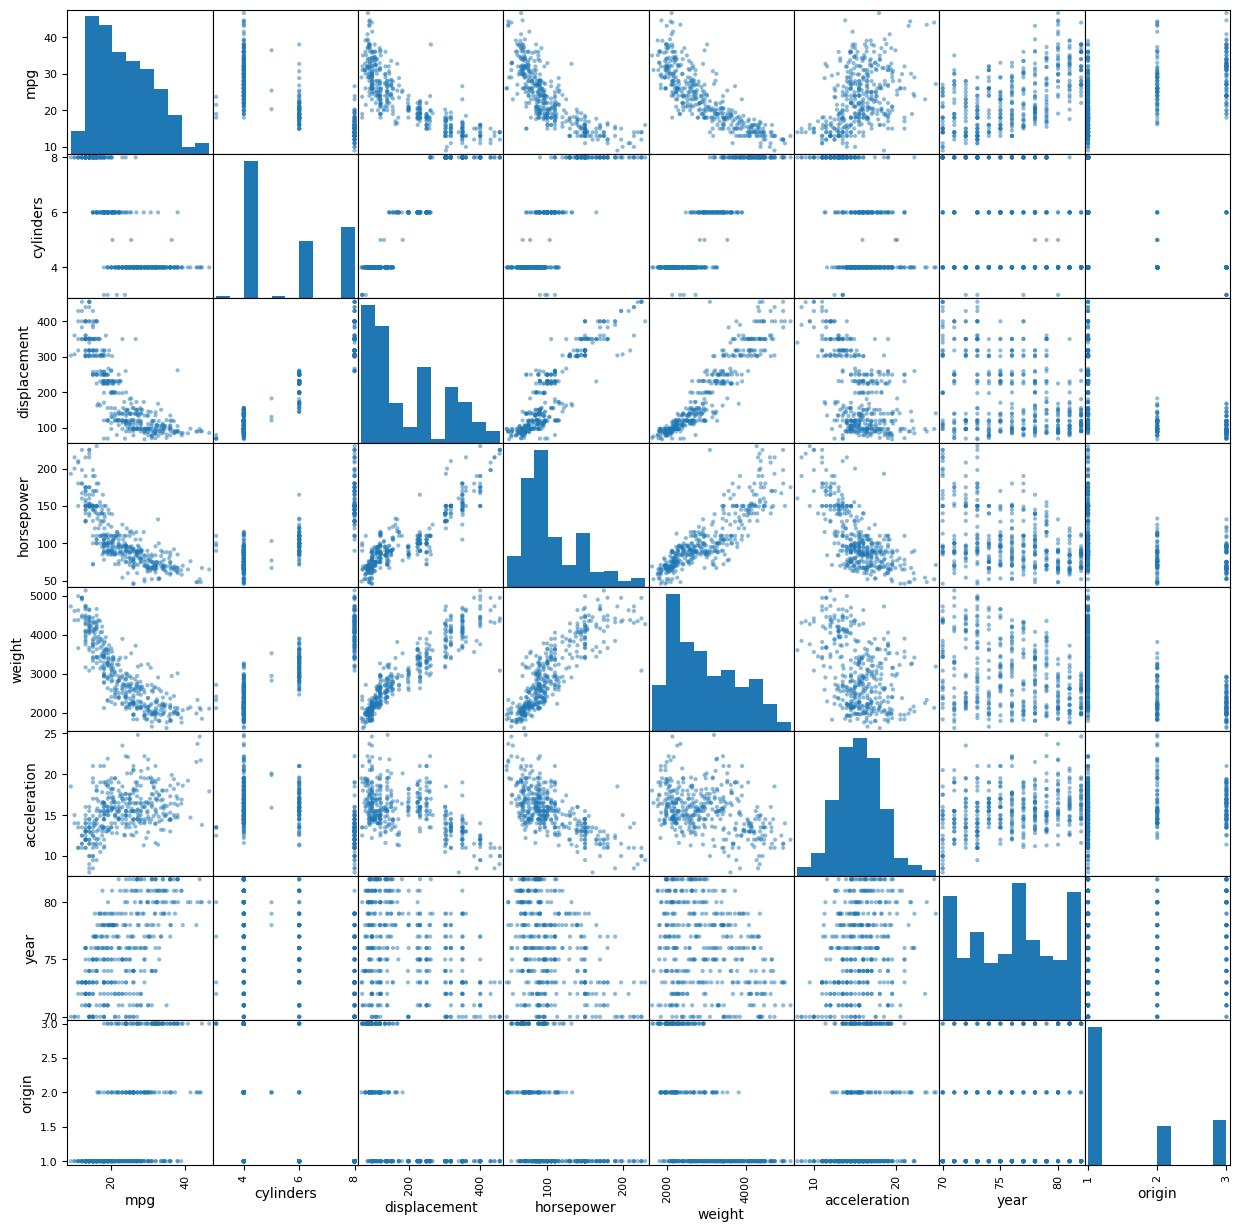

In [27]:
# Columns that seem to be related with each other: 
selected_columns = ["mpg", "displacement", "weight", "horsepower", "acceleration"]
pd.plotting.scatter_matrix(Auto, figsize=(15,15));

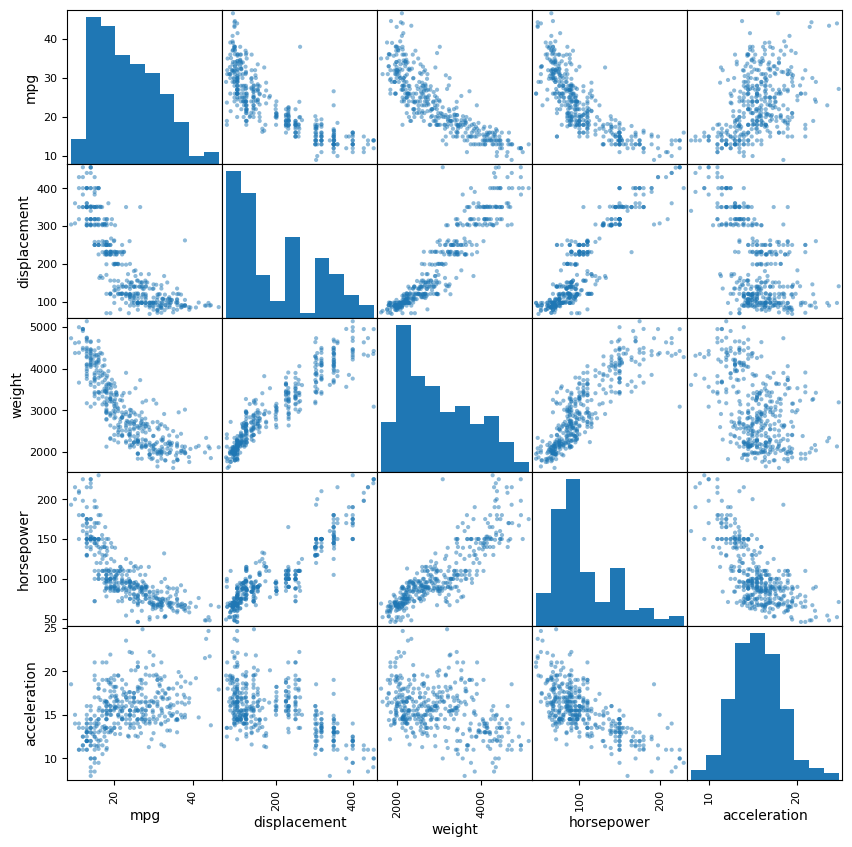

In [28]:
pd.plotting.scatter_matrix(Auto[selected_columns], figsize=(10,10));

From the pair-wise scatter plot, we can observe that:
- The scatter plot suggests negative correlations between the pairs: `mpg` - `displacement`, `mpg` - `weight` and `mpg` - `horsepower`. This is because we observe that as the value of  `displacement`, `weight` or `horserpower` increase, the value of `mpg` decreases. The scatter plots also indicates the relationships of `mpg` with them are non-linear.
- In addition, yhere seems to be a positive correlation between `displacement` and `weight`, between `displacement` and `horsepower`. The relationships between `displacement` and `weight`/`horsepower` is linear because we can draw a line to represent the data points.

Moreover, taking a closer look at the histogram of `acceleration`, we can see that `acceleration` follow a normal distribution.

#### (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In case we want to predict gas mileage based on other variables, the `displacement`, `weight` and `horsepower` can be used. The previous scatter plot displays displays a clear nonlinear trend between `mpg` and `displacement`/`weight`/ `horsepower`

We also calculate the Pearson correlation coefficient  between `mpg` and all other varibles. As can be seen in the below outputs, weight, displacement and horsepower have the Pearson correlation coefficient values approaching -1. This point consolidates our suggestion that these 3 variables could be used to predict `mpg`

In [38]:
Auto.corr(method="pearson", numeric_only=True)\
    .loc[:, 'mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
year            0.580541
mpg             1.000000
Name: mpg, dtype: float64